# Importing Relevant Libraries 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 

warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix



In [2]:
data = pd.read_csv(r"D:\Python Resources\Indian+Air+Quality+Files\Note Book\data.csv",encoding='unicode_escape')

In [3]:
df = data.copy()

# Understanding The Data 

In [4]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [5]:
df.dtypes

stn_code                        object
sampling_date                   object
state                           object
location                        object
agency                          object
type                            object
so2                            float64
no2                            float64
rspm                           float64
spm                            float64
location_monitoring_station     object
pm2_5                          float64
date                            object
dtype: object

In [6]:
df.shape


(435742, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [8]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [9]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [10]:
df.nunique()

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

In [11]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

#rspm(respirable suspended particulate matter)
#spm(suspended particulate matter )


# Exploratory Data Analysis & Visualisation

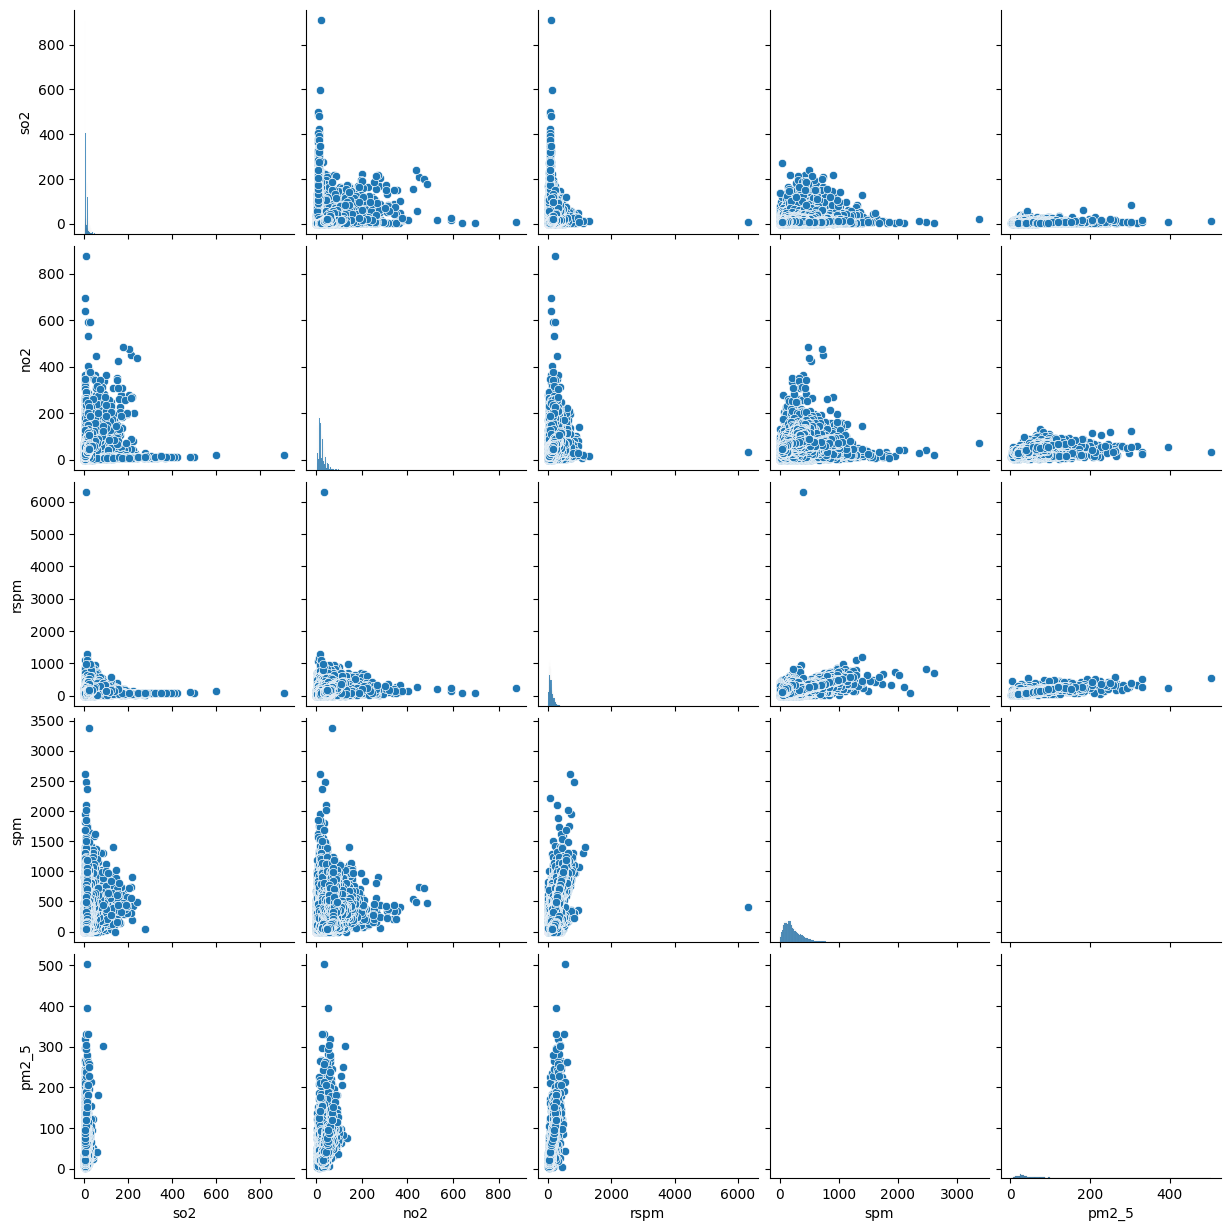

In [12]:
sns.pairplot(data=df)

In [13]:
df['state'].value_counts()

Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     1961
J

[]

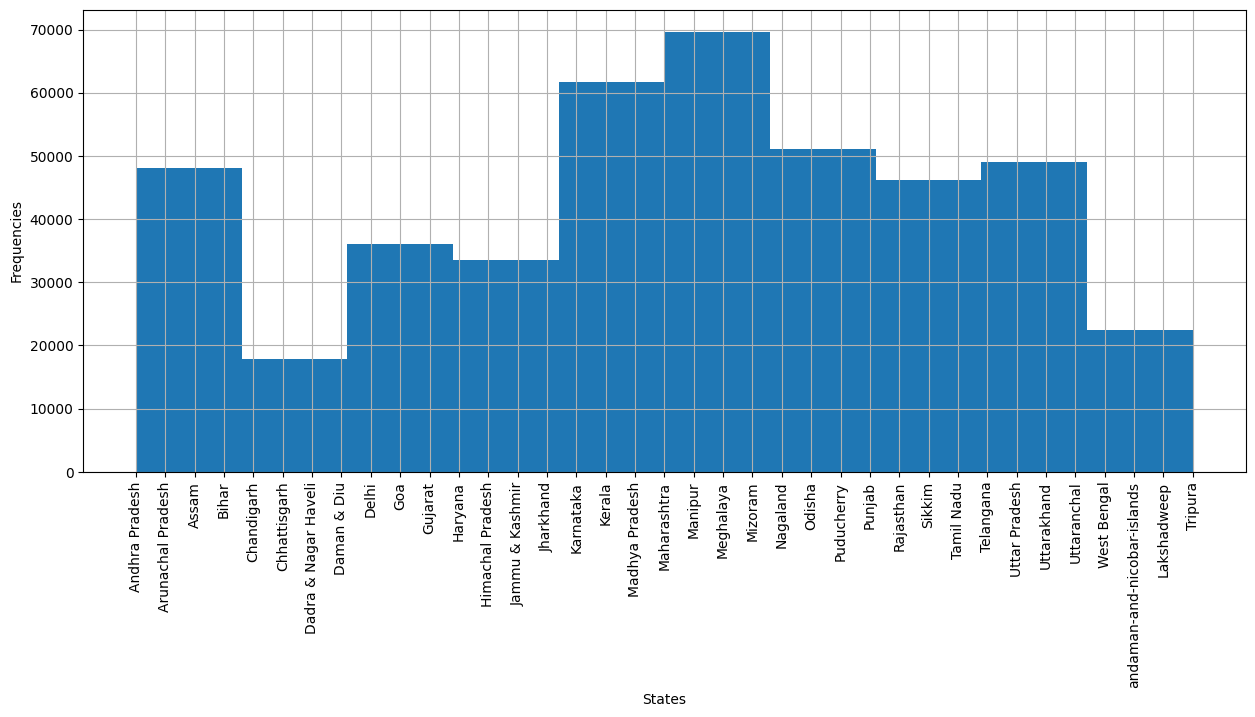

In [14]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel("States")
plt.ylabel("Frequencies")
plt.plot()

In [15]:
df['type'].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

[]

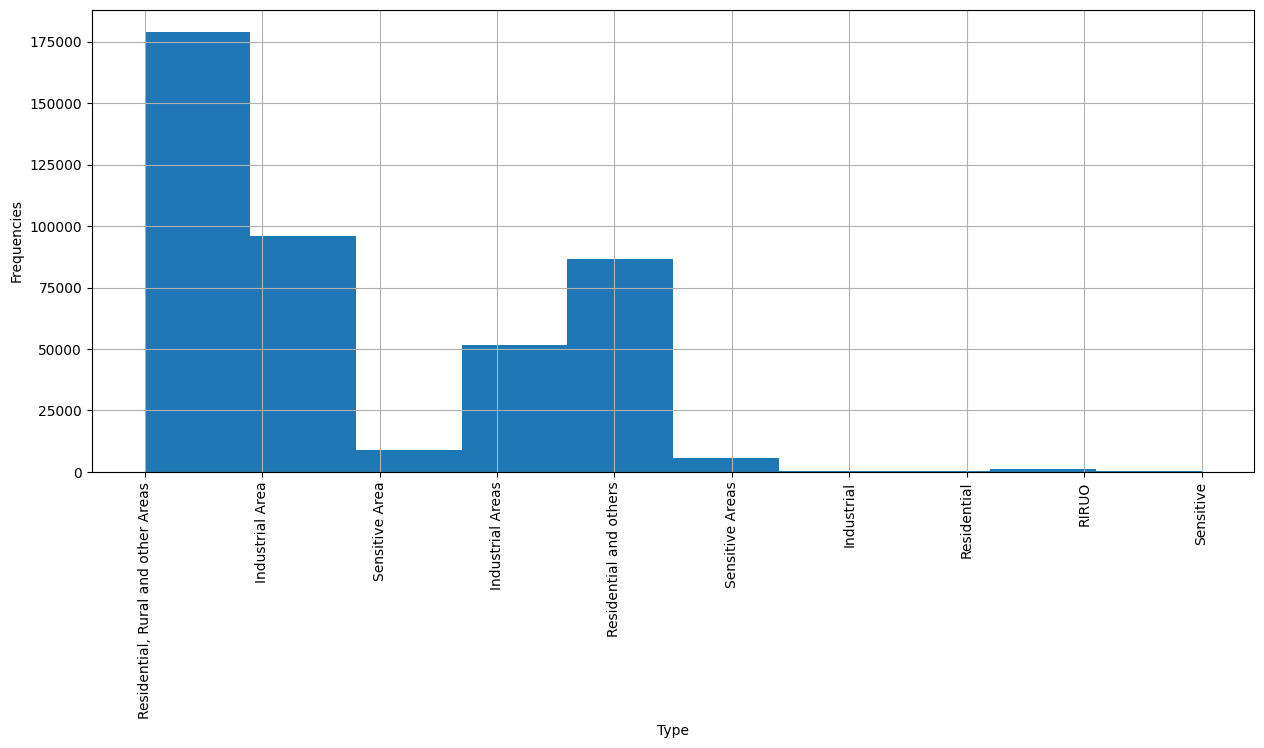

In [16]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel("Type")
plt.ylabel("Frequencies")
plt.plot()

In [17]:
df['agency'].value_counts()

Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: agency, Length: 64, dtype: int64

[]

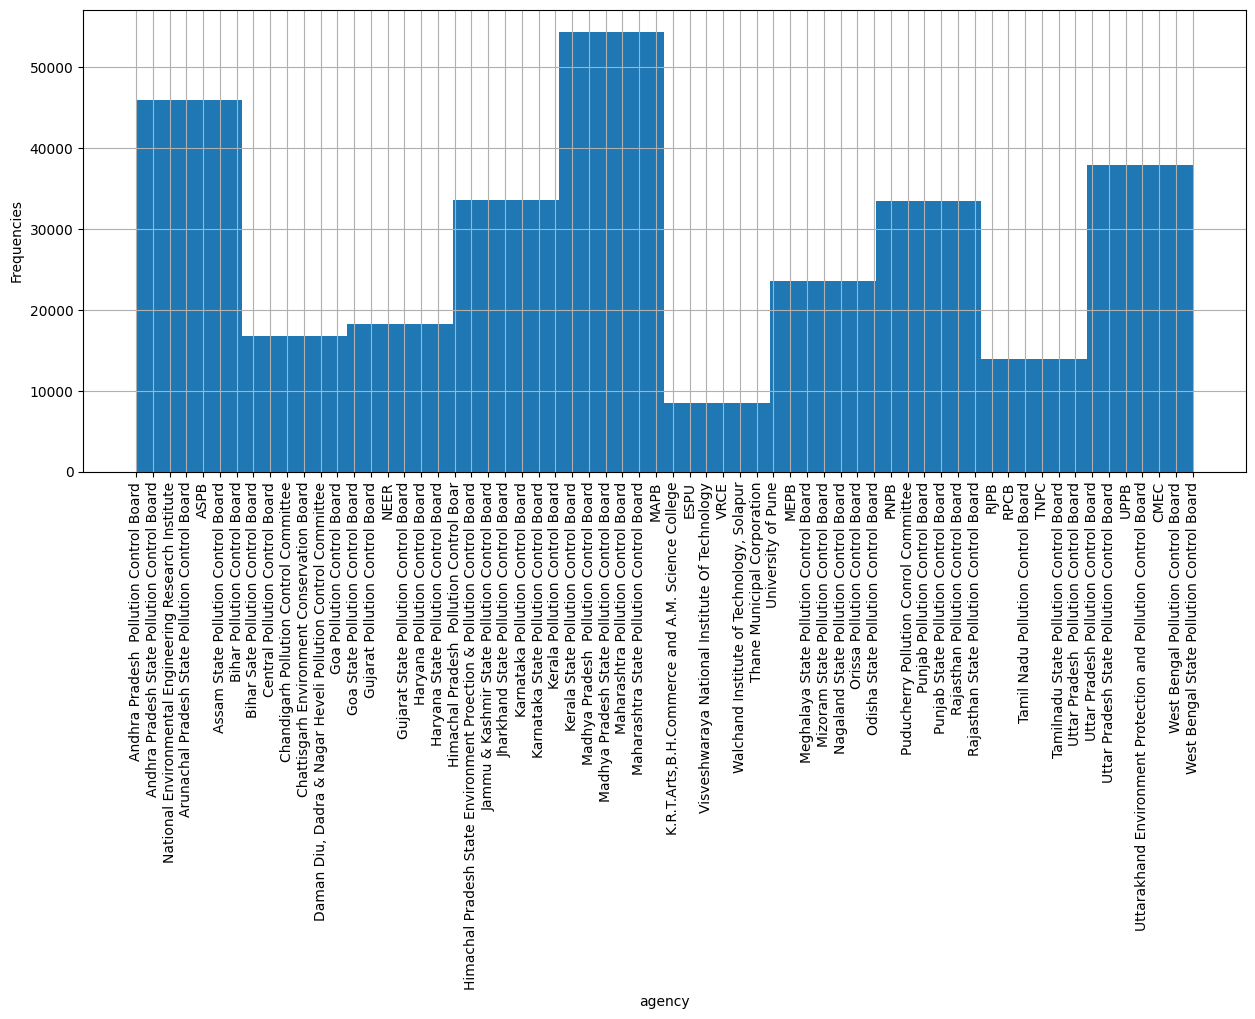

In [18]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel("agency")
plt.ylabel("Frequencies")
plt.plot()

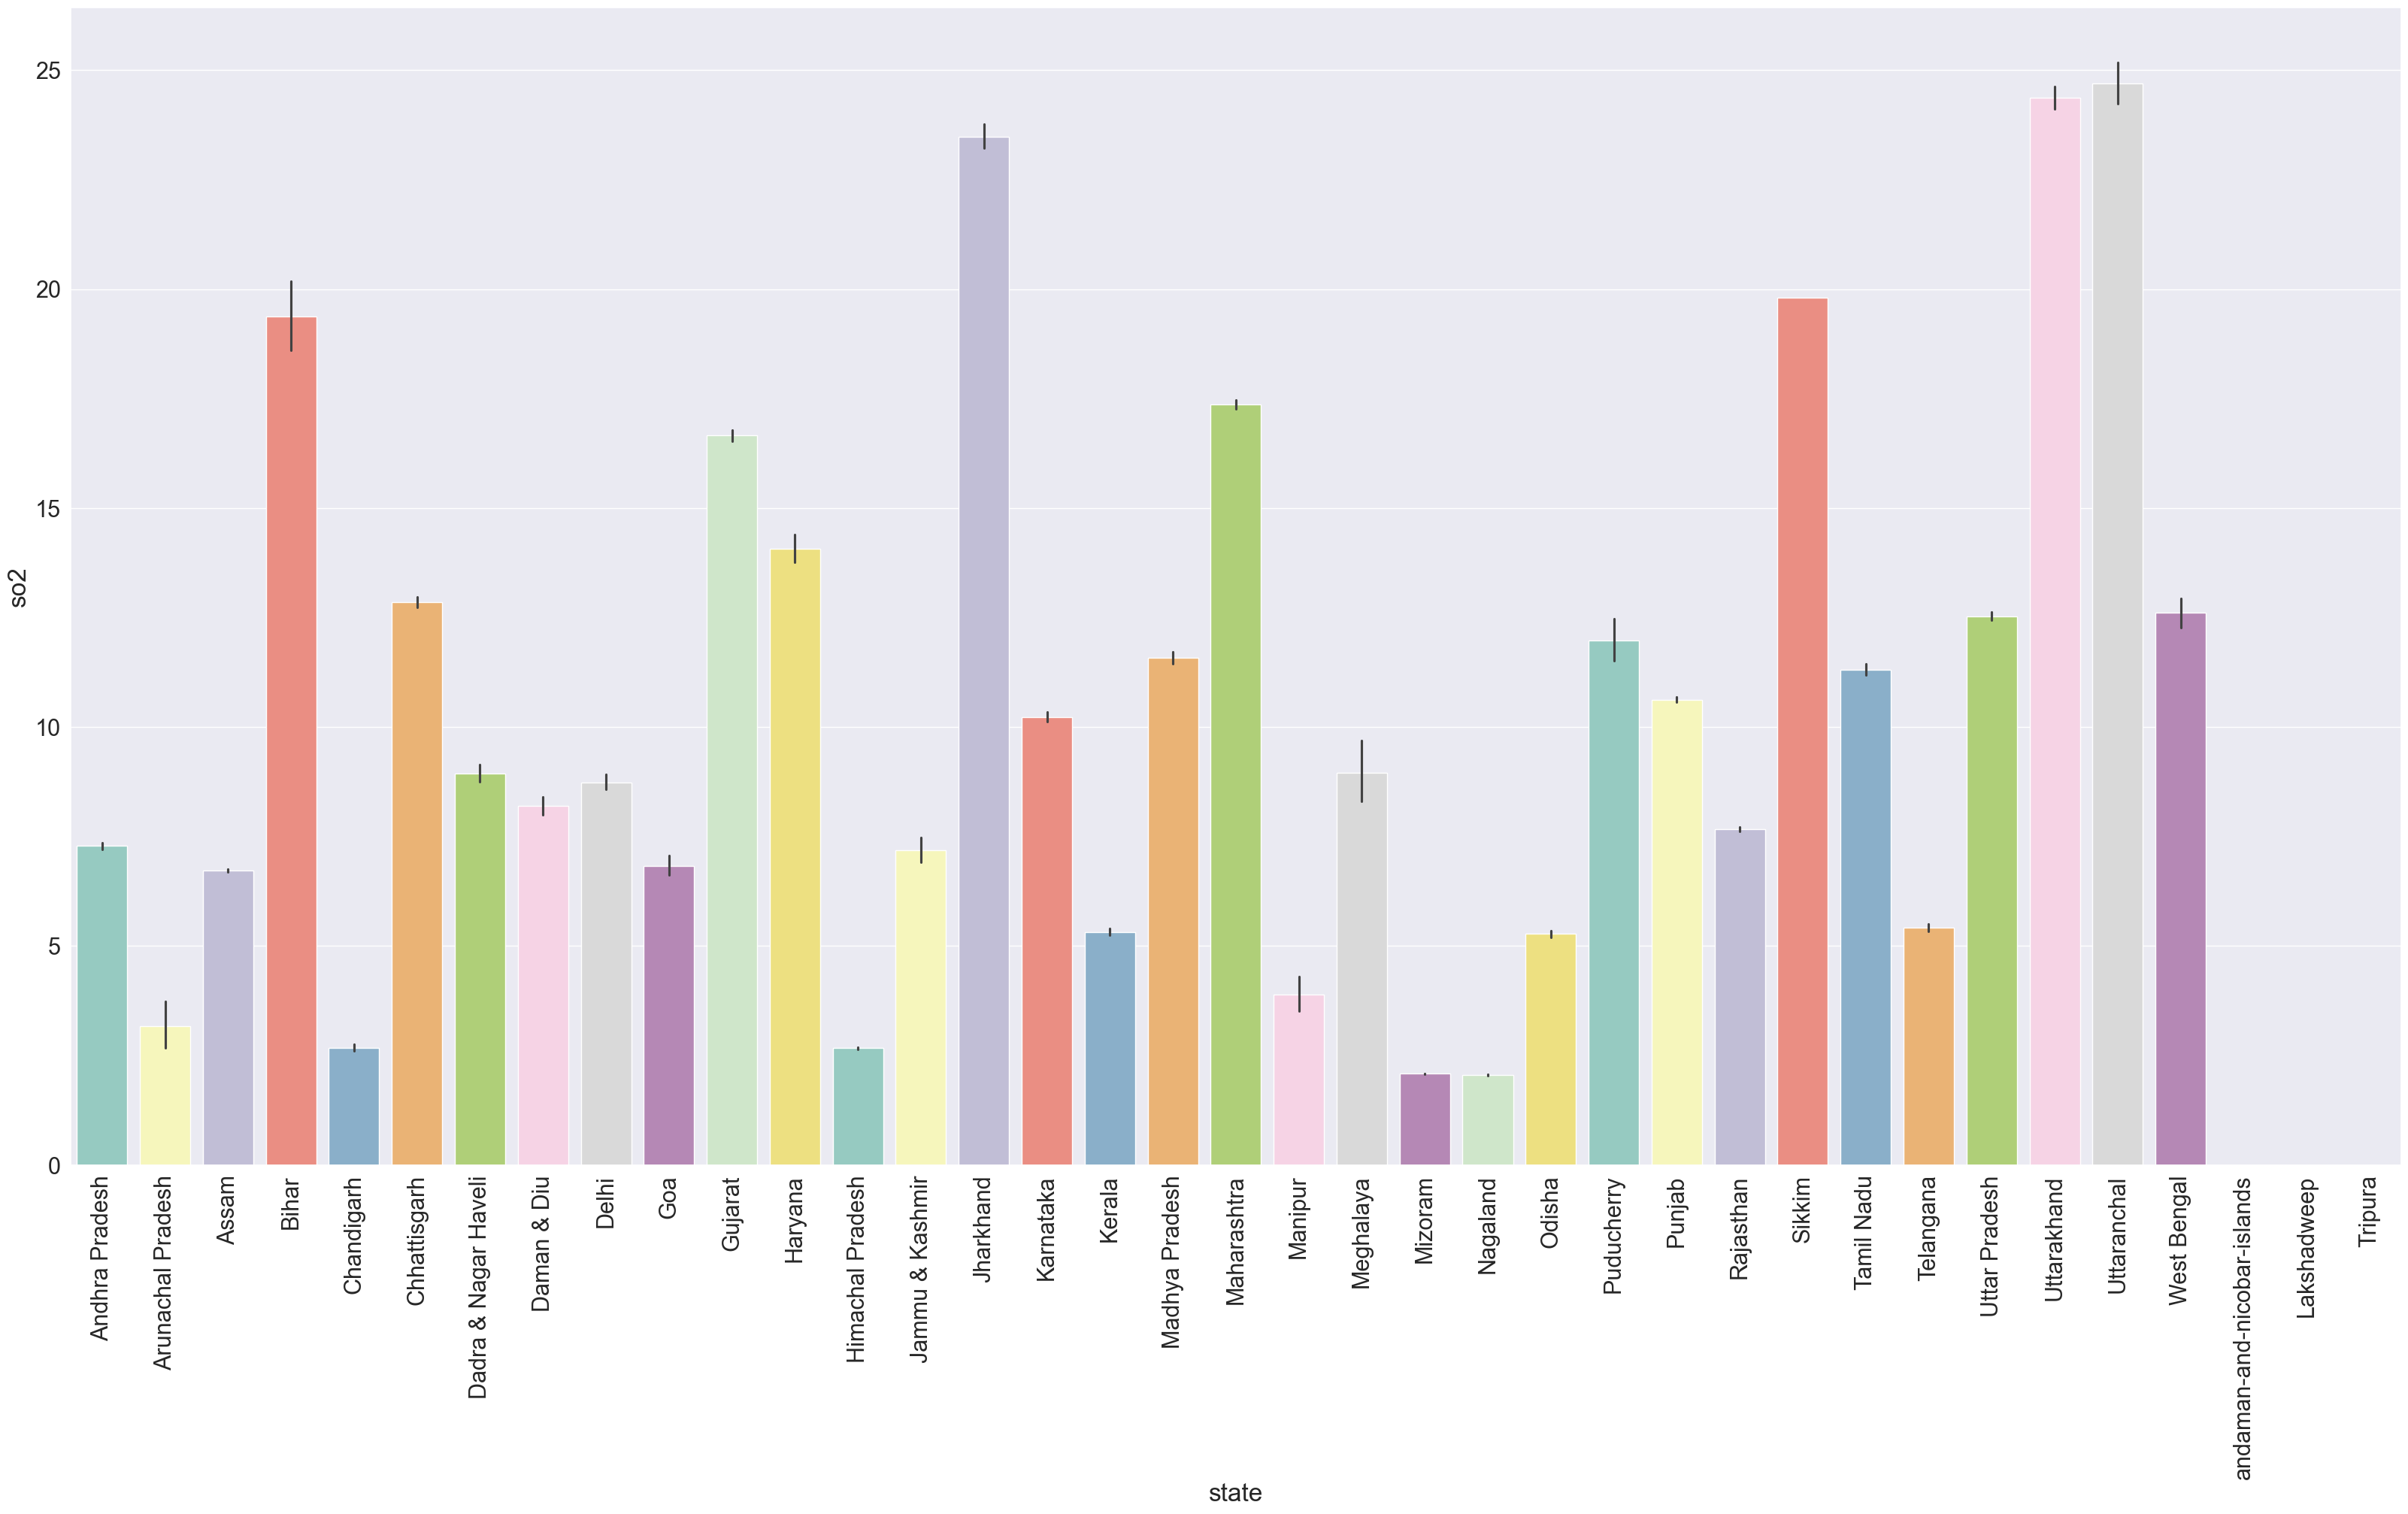

In [34]:
plt.figure(figsize=(40, 20))
plt.xticks(rotation=90)
custom_palette = sns.color_palette("Set3", n_colors=len(df['state']))
sns.barplot(x='state',y='so2',data=df,palette = custom_palette)
sns.set(font_scale=.5)

In [35]:
plt.rcParams['figure.figsize'] = (30,10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'Nagaland'),
  Text(1, 0, 'Mizoram'),
  Text(2, 0, 'Himachal Pradesh'),
  Text(3, 0, 'Chandigarh'),
  Text(4, 0, 'Arunachal Pradesh'),
  Text(5, 0, 'Manipur'),
  Text(6, 0, 'Odisha'),
  Text(7, 0, 'Kerala'),
  Text(8, 0, 'Telangana'),
  Text(9, 0, 'Assam'),
  Text(10, 0, 'Goa'),
  Text(11, 0, 'Jammu & Kashmir'),
  Text(12, 0, 'Andhra Pradesh'),
  Text(13, 0, 'Rajasthan'),
  Text(14, 0, 'Daman & Diu'),
  Text(15, 0, 'Delhi'),
  Text(16, 0, 'Dadra & Nagar Haveli'),
  Text(17, 0, 'Meghalaya'),
  Text(18, 0, 'Karnataka'),
  Text(19, 0, 'Punjab'),
  Text(20, 0, 'Tamil Nadu'),
  Text(21, 0, 'Madhya Pradesh'),
  Text(22, 0, 'Puducherry'),
  Text(23, 0, 'Uttar Pradesh'),
  Text(24, 0, 'West Bengal'),
  Text(25, 0, 'Chhattisgarh'),
  Text(26, 0, 'Haryana'),
  Text(27, 0, 'Gujarat'),
  Text(28, 0, 'Maharashtra')

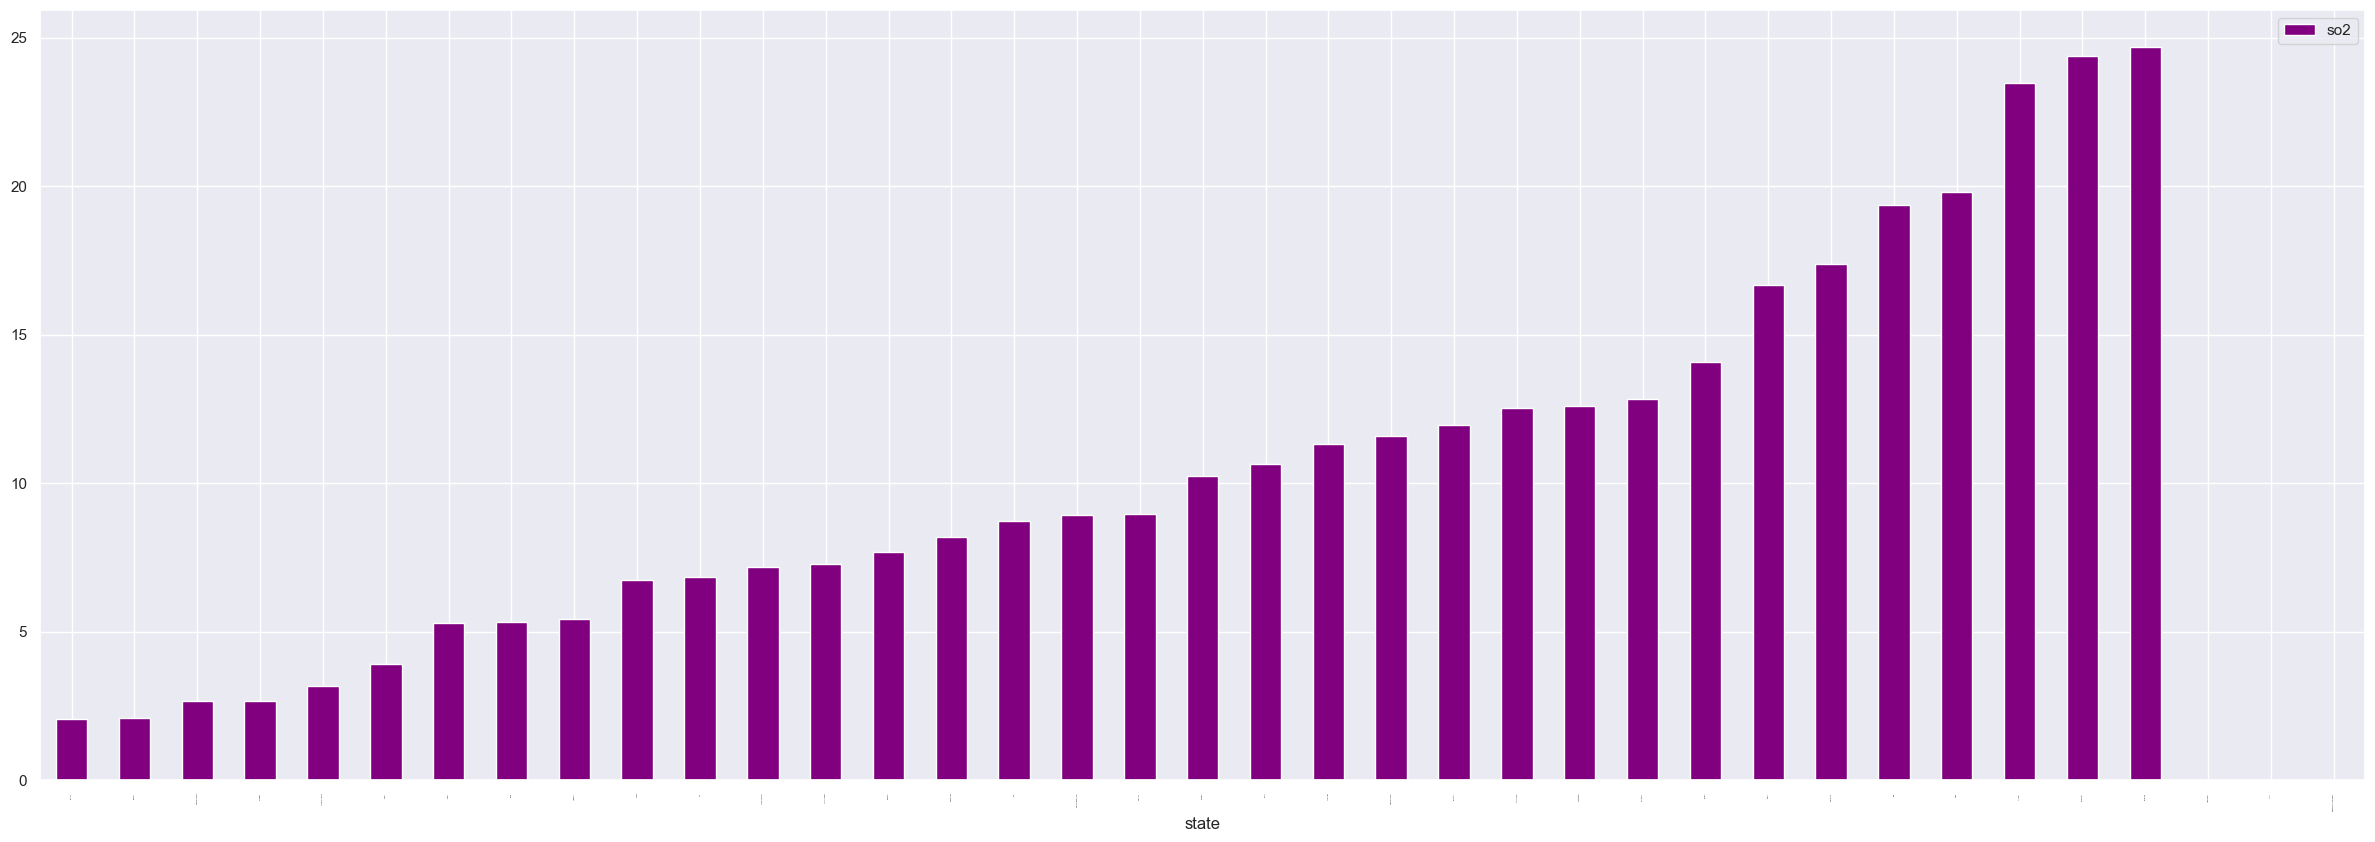

In [40]:
df[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='purple')
plt.xticks(fontsize=1)

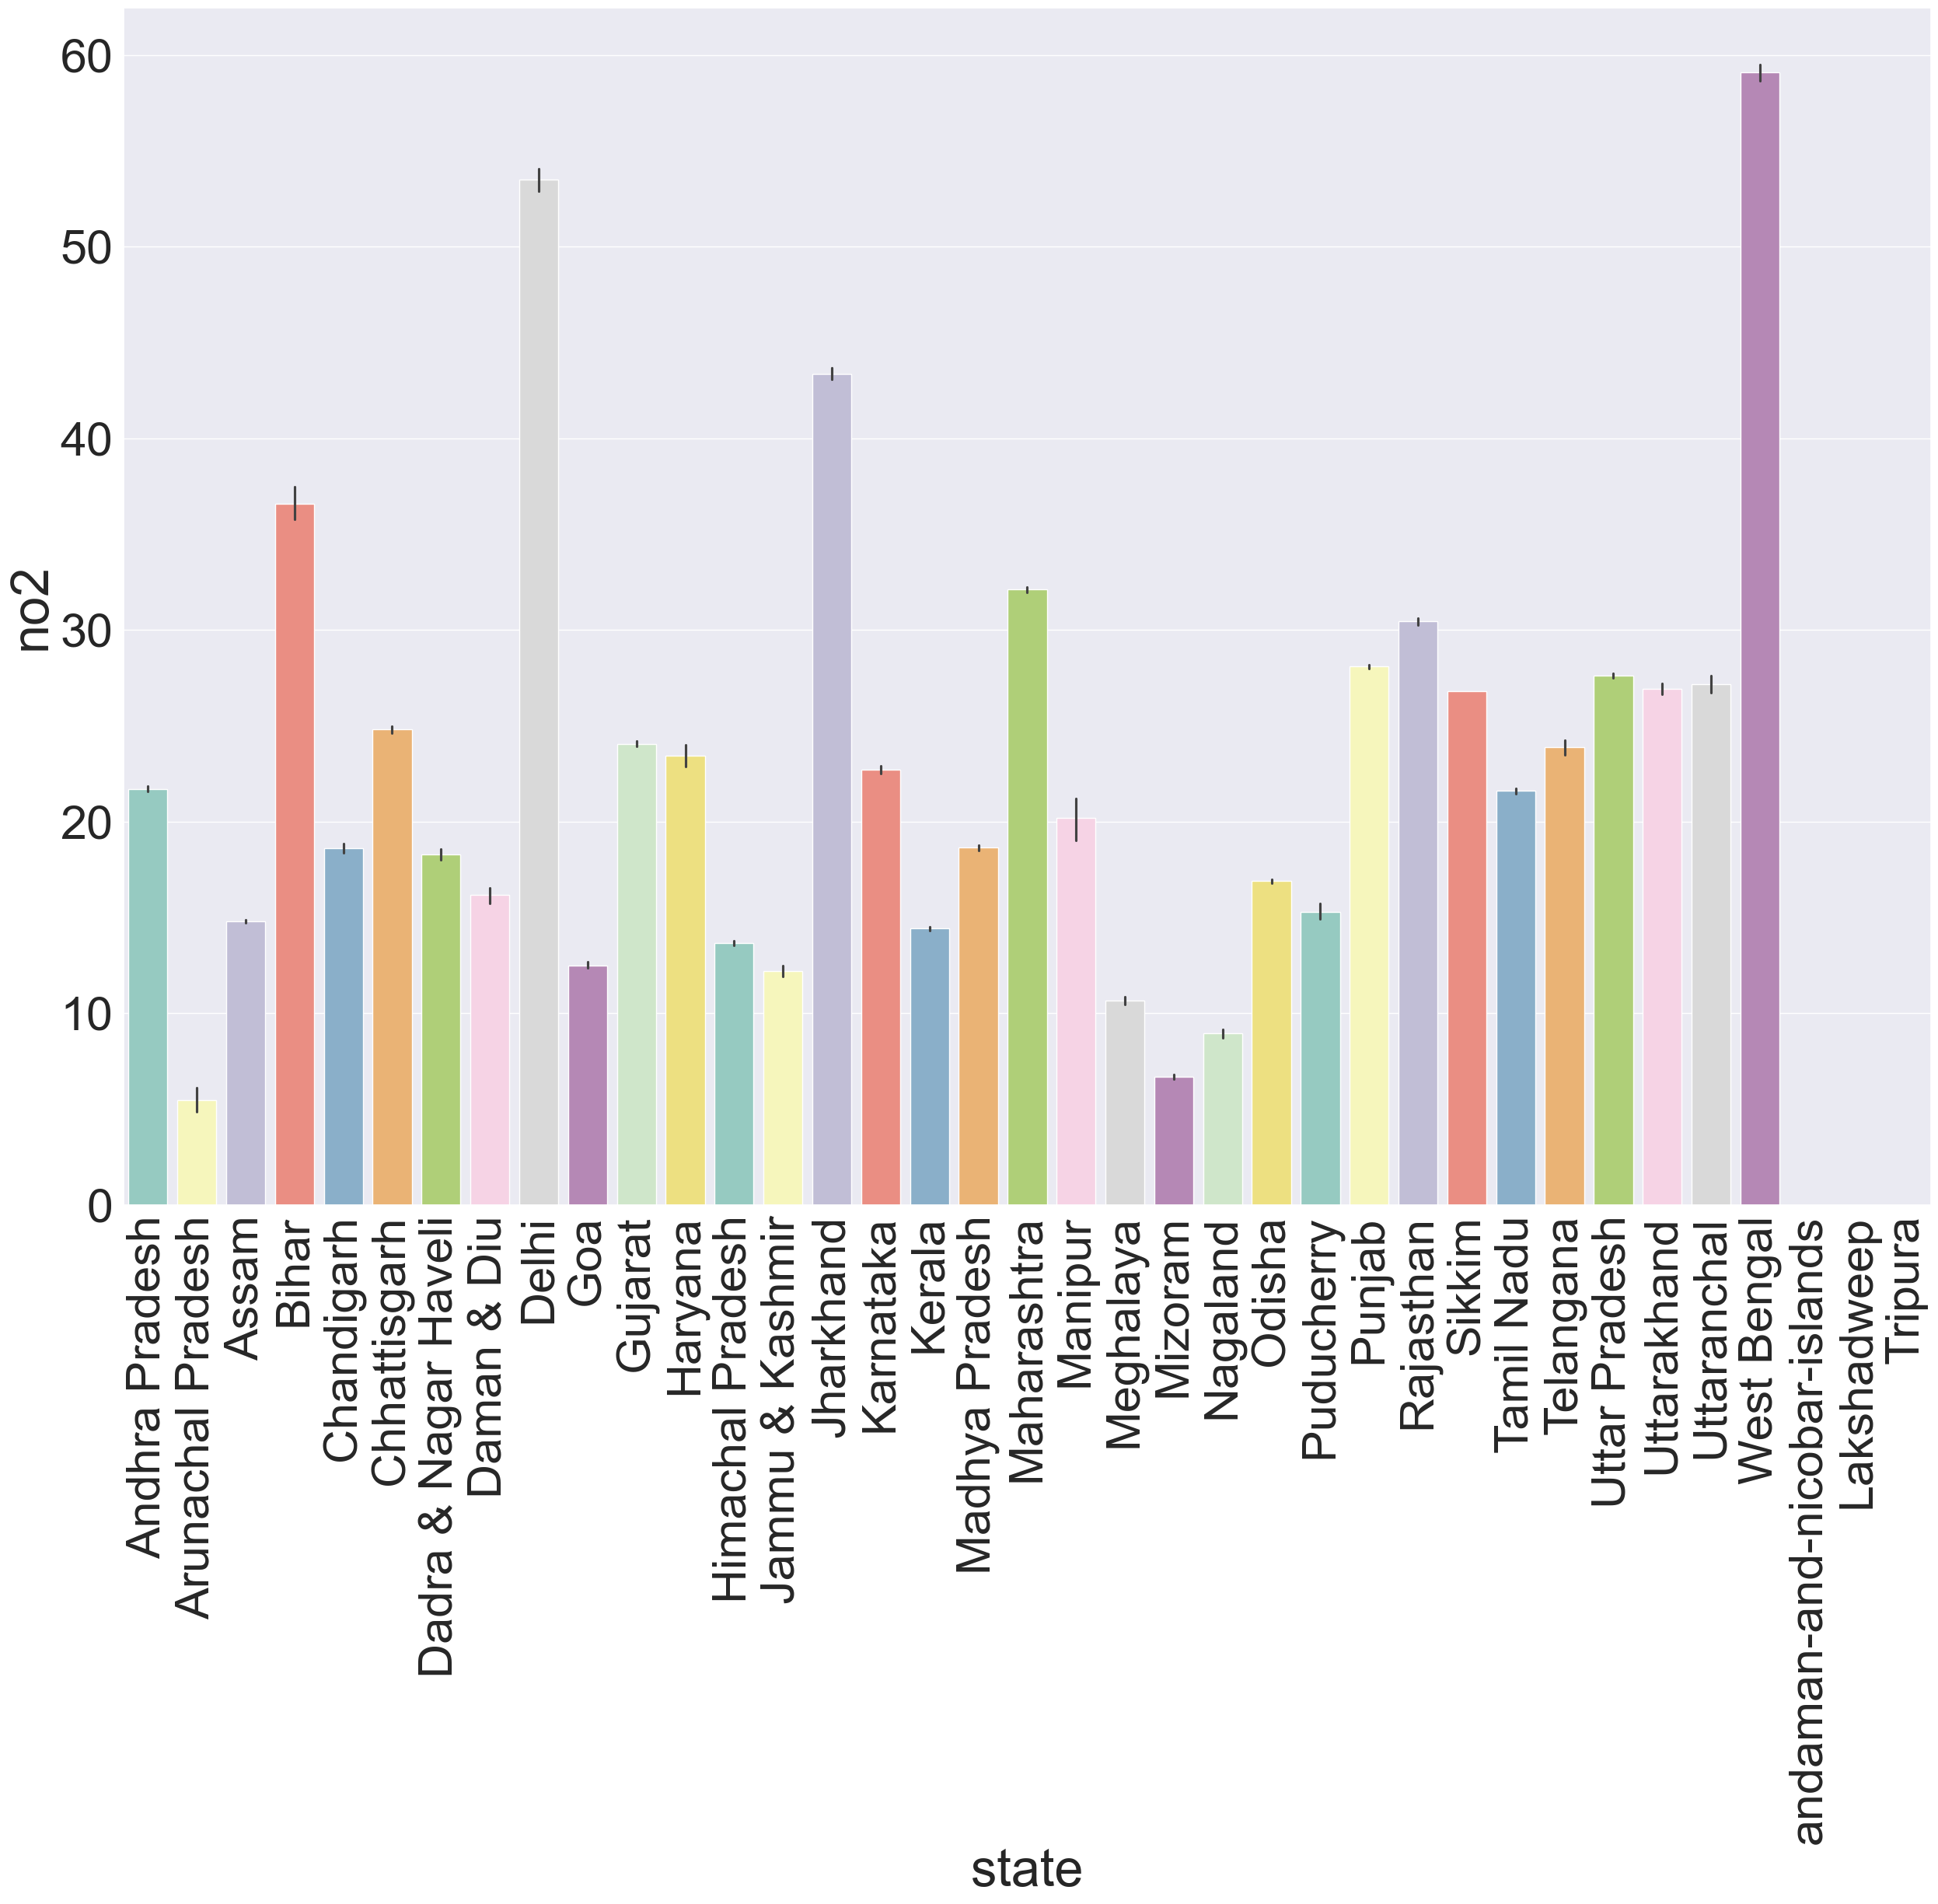

In [50]:
plt.figure(figsize=(30, 20))
plt.xticks(rotation=90)
custom_palette = sns.color_palette("Set3", n_colors=len(df['state']))
sns.barplot(x='state',y='no2',data=df,palette= custom_palette)
sns.set(font_scale=5)

<AxesSubplot: xlabel='state'>

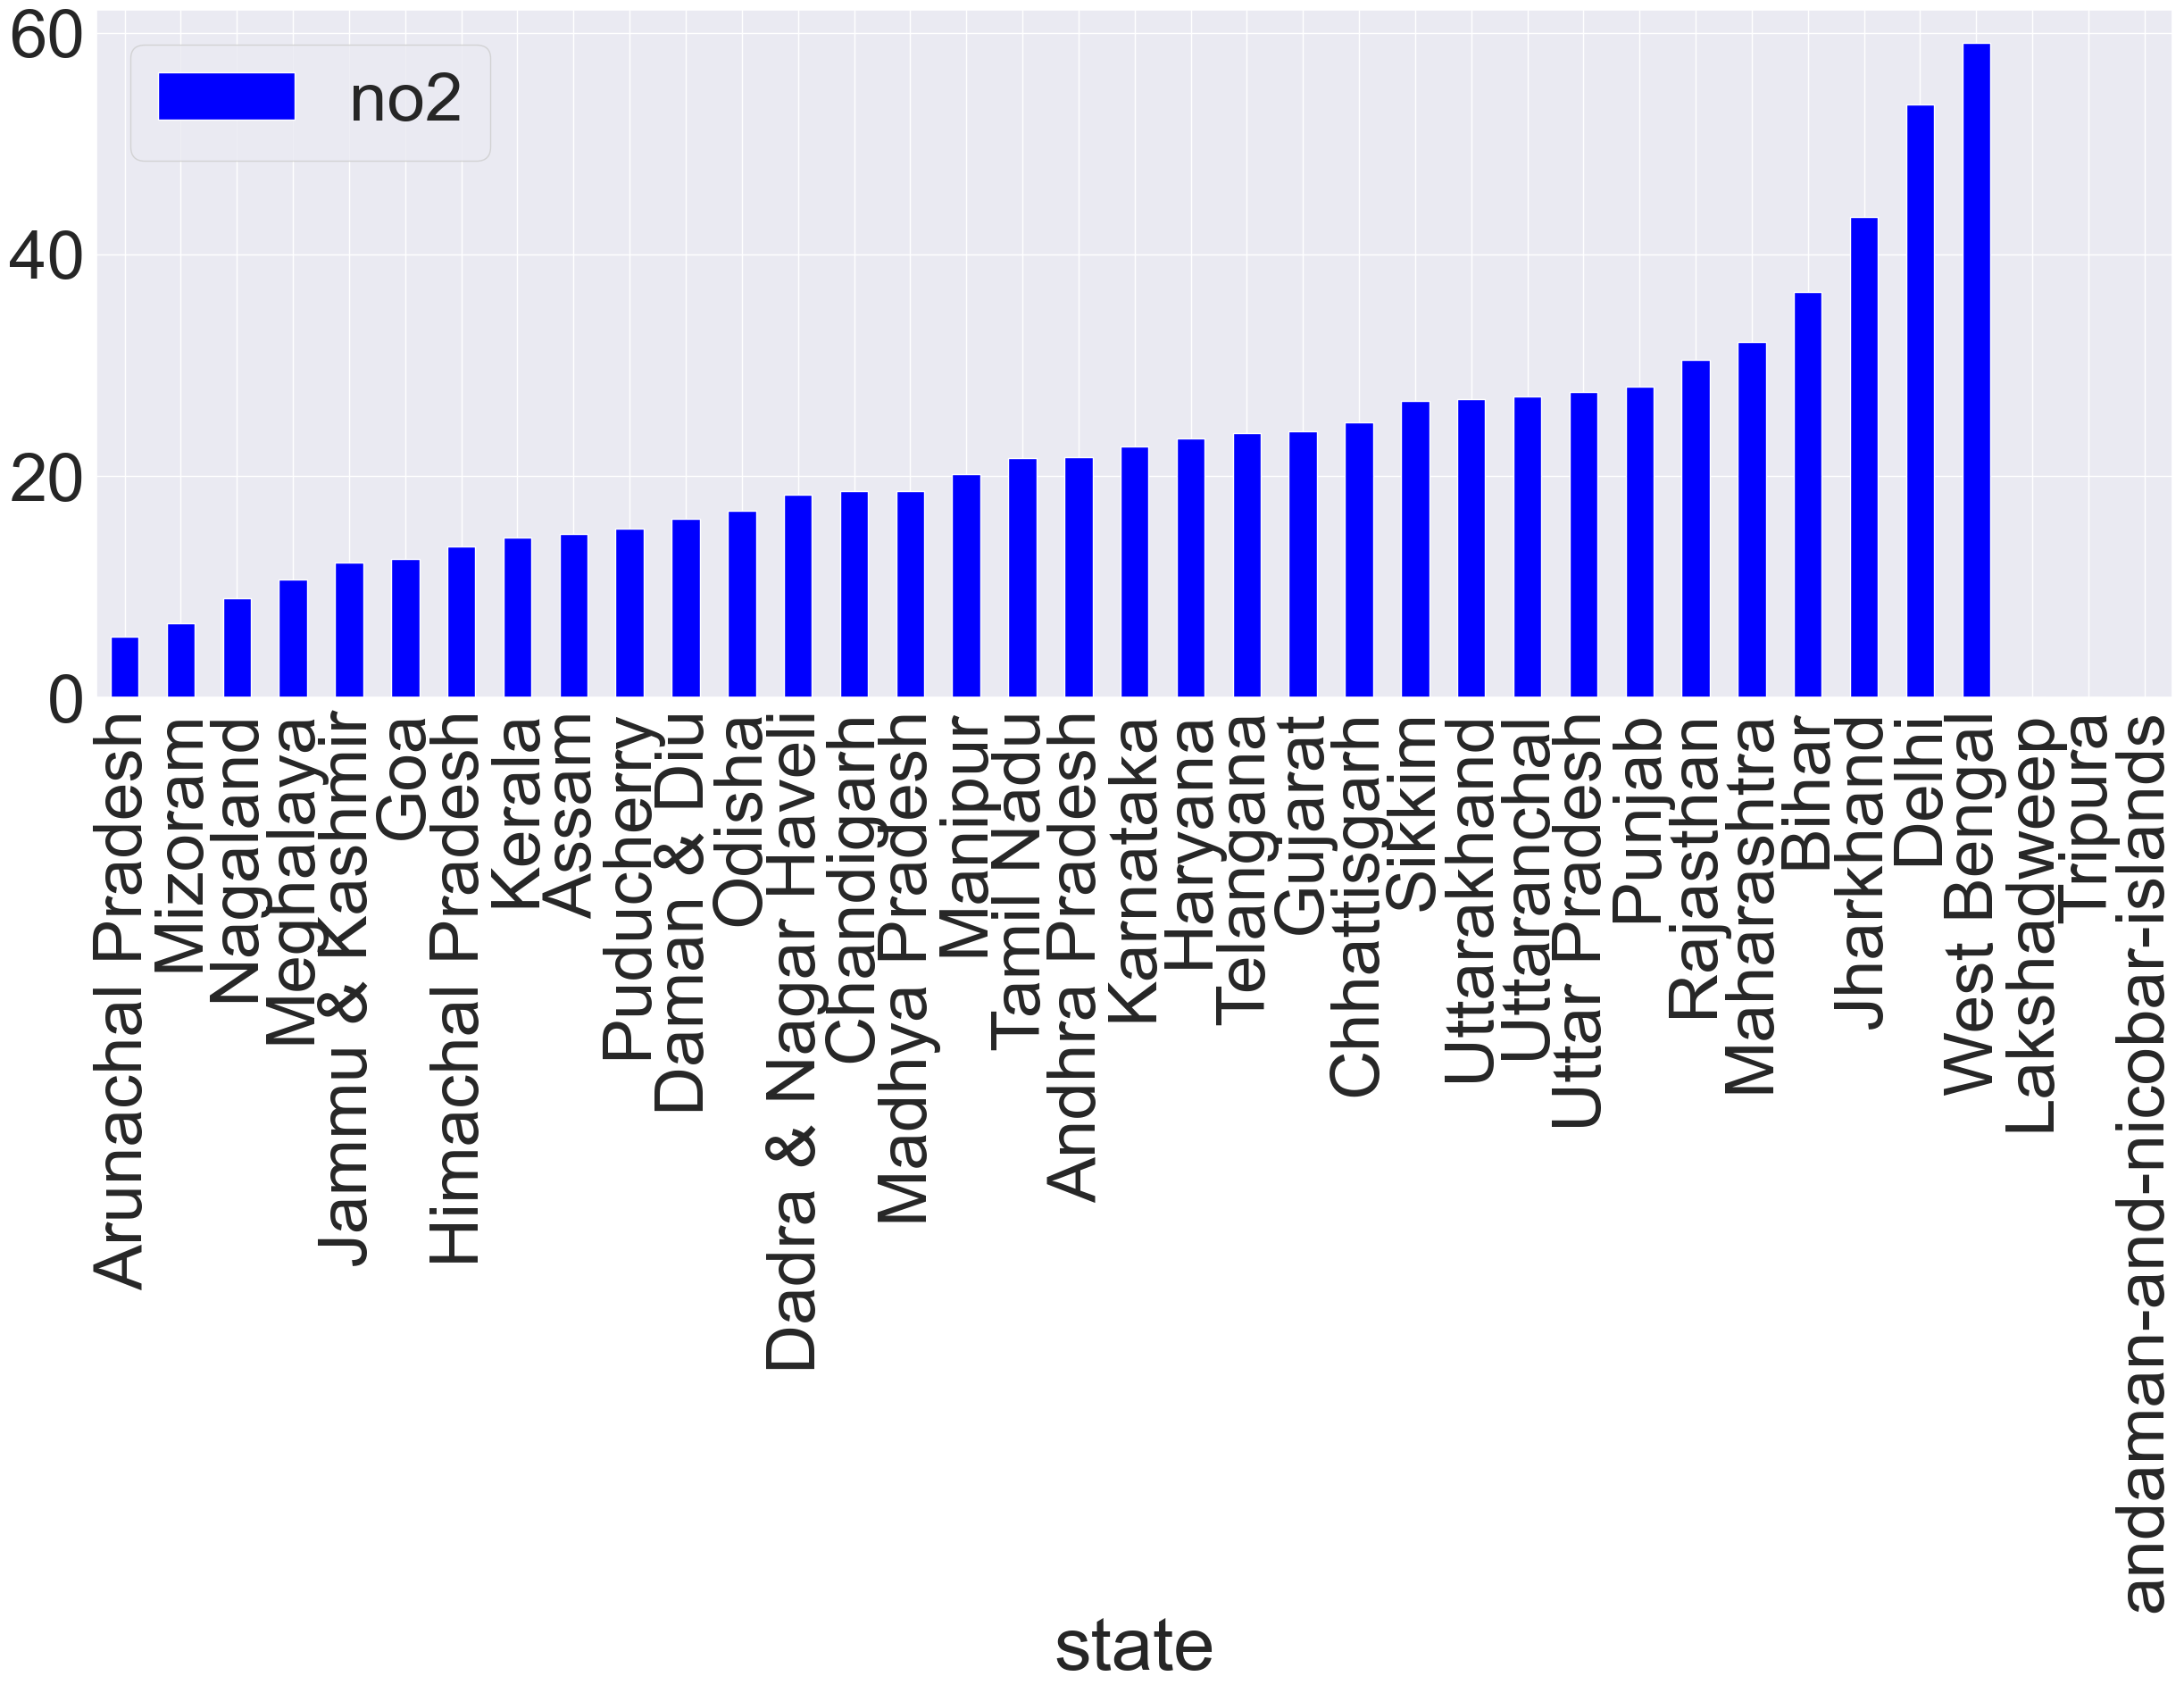

In [51]:
df[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='blue')

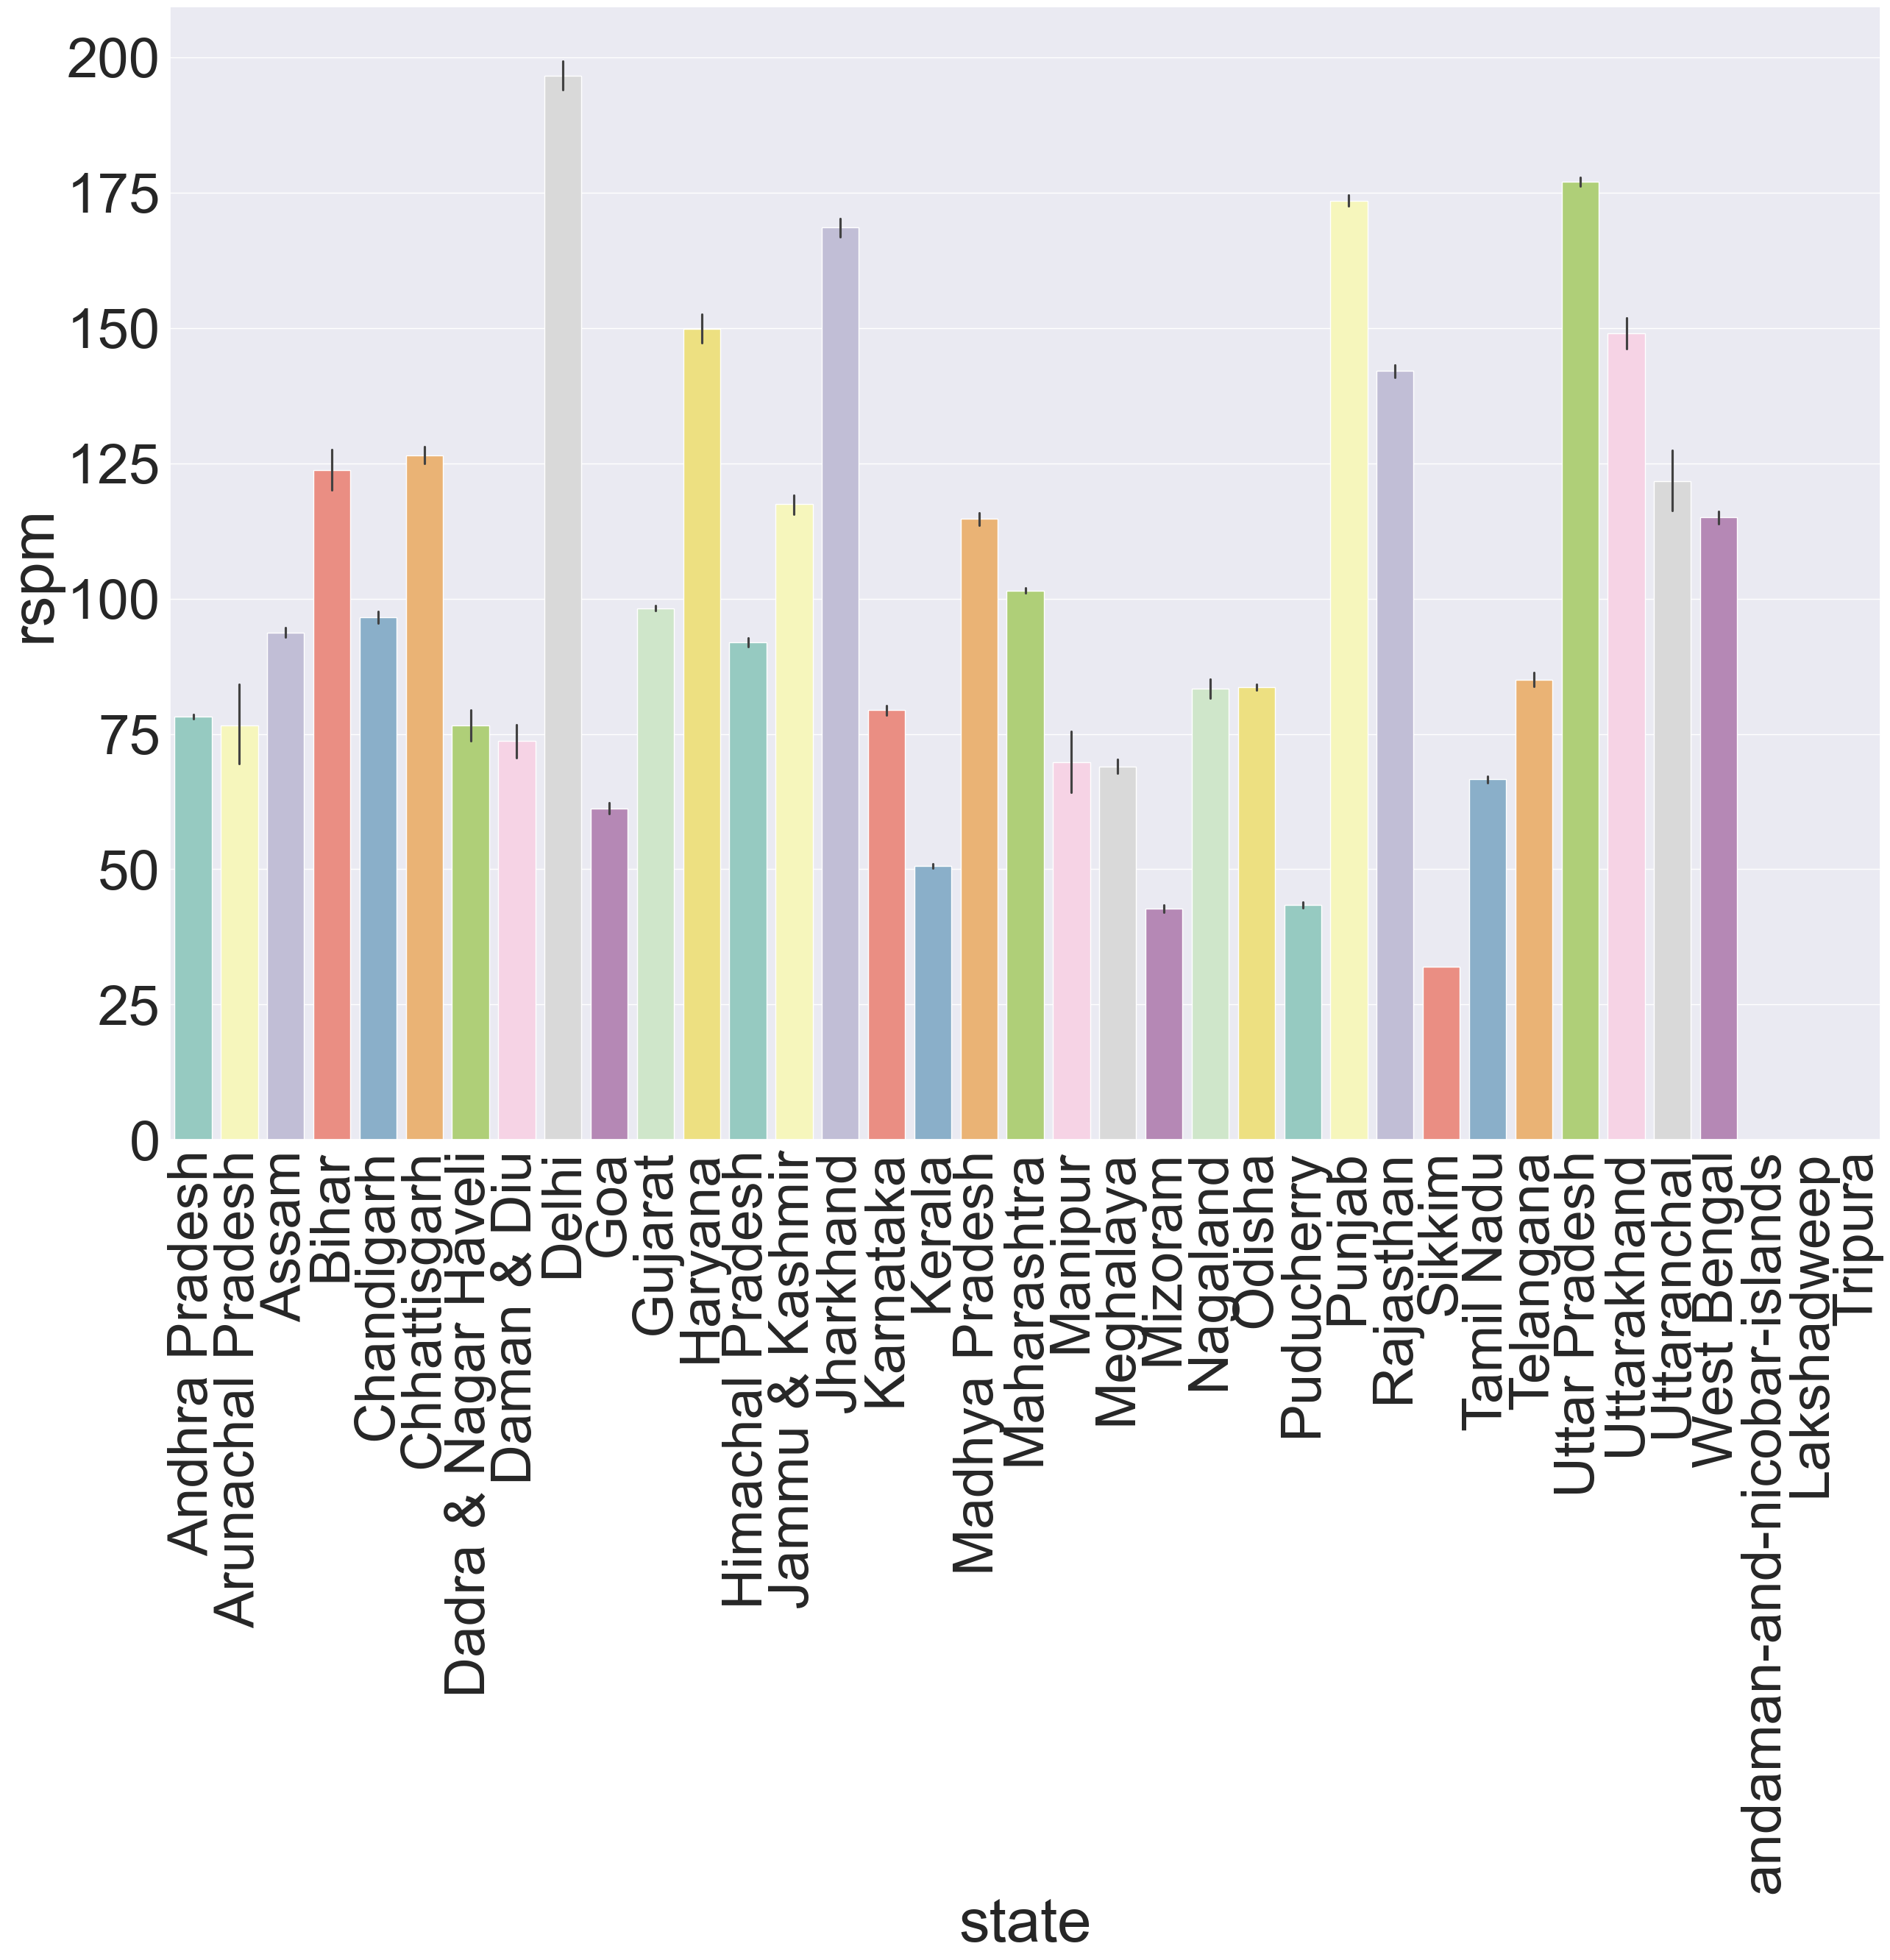

In [52]:
plt.figure(figsize=(30, 20))
plt.xticks(rotation=90)
custom_palette = sns.color_palette("Set3", n_colors=len(df['state']))
sns.barplot(x='state',y='rspm',data=df,palette= custom_palette)
sns.set(font_scale=5)

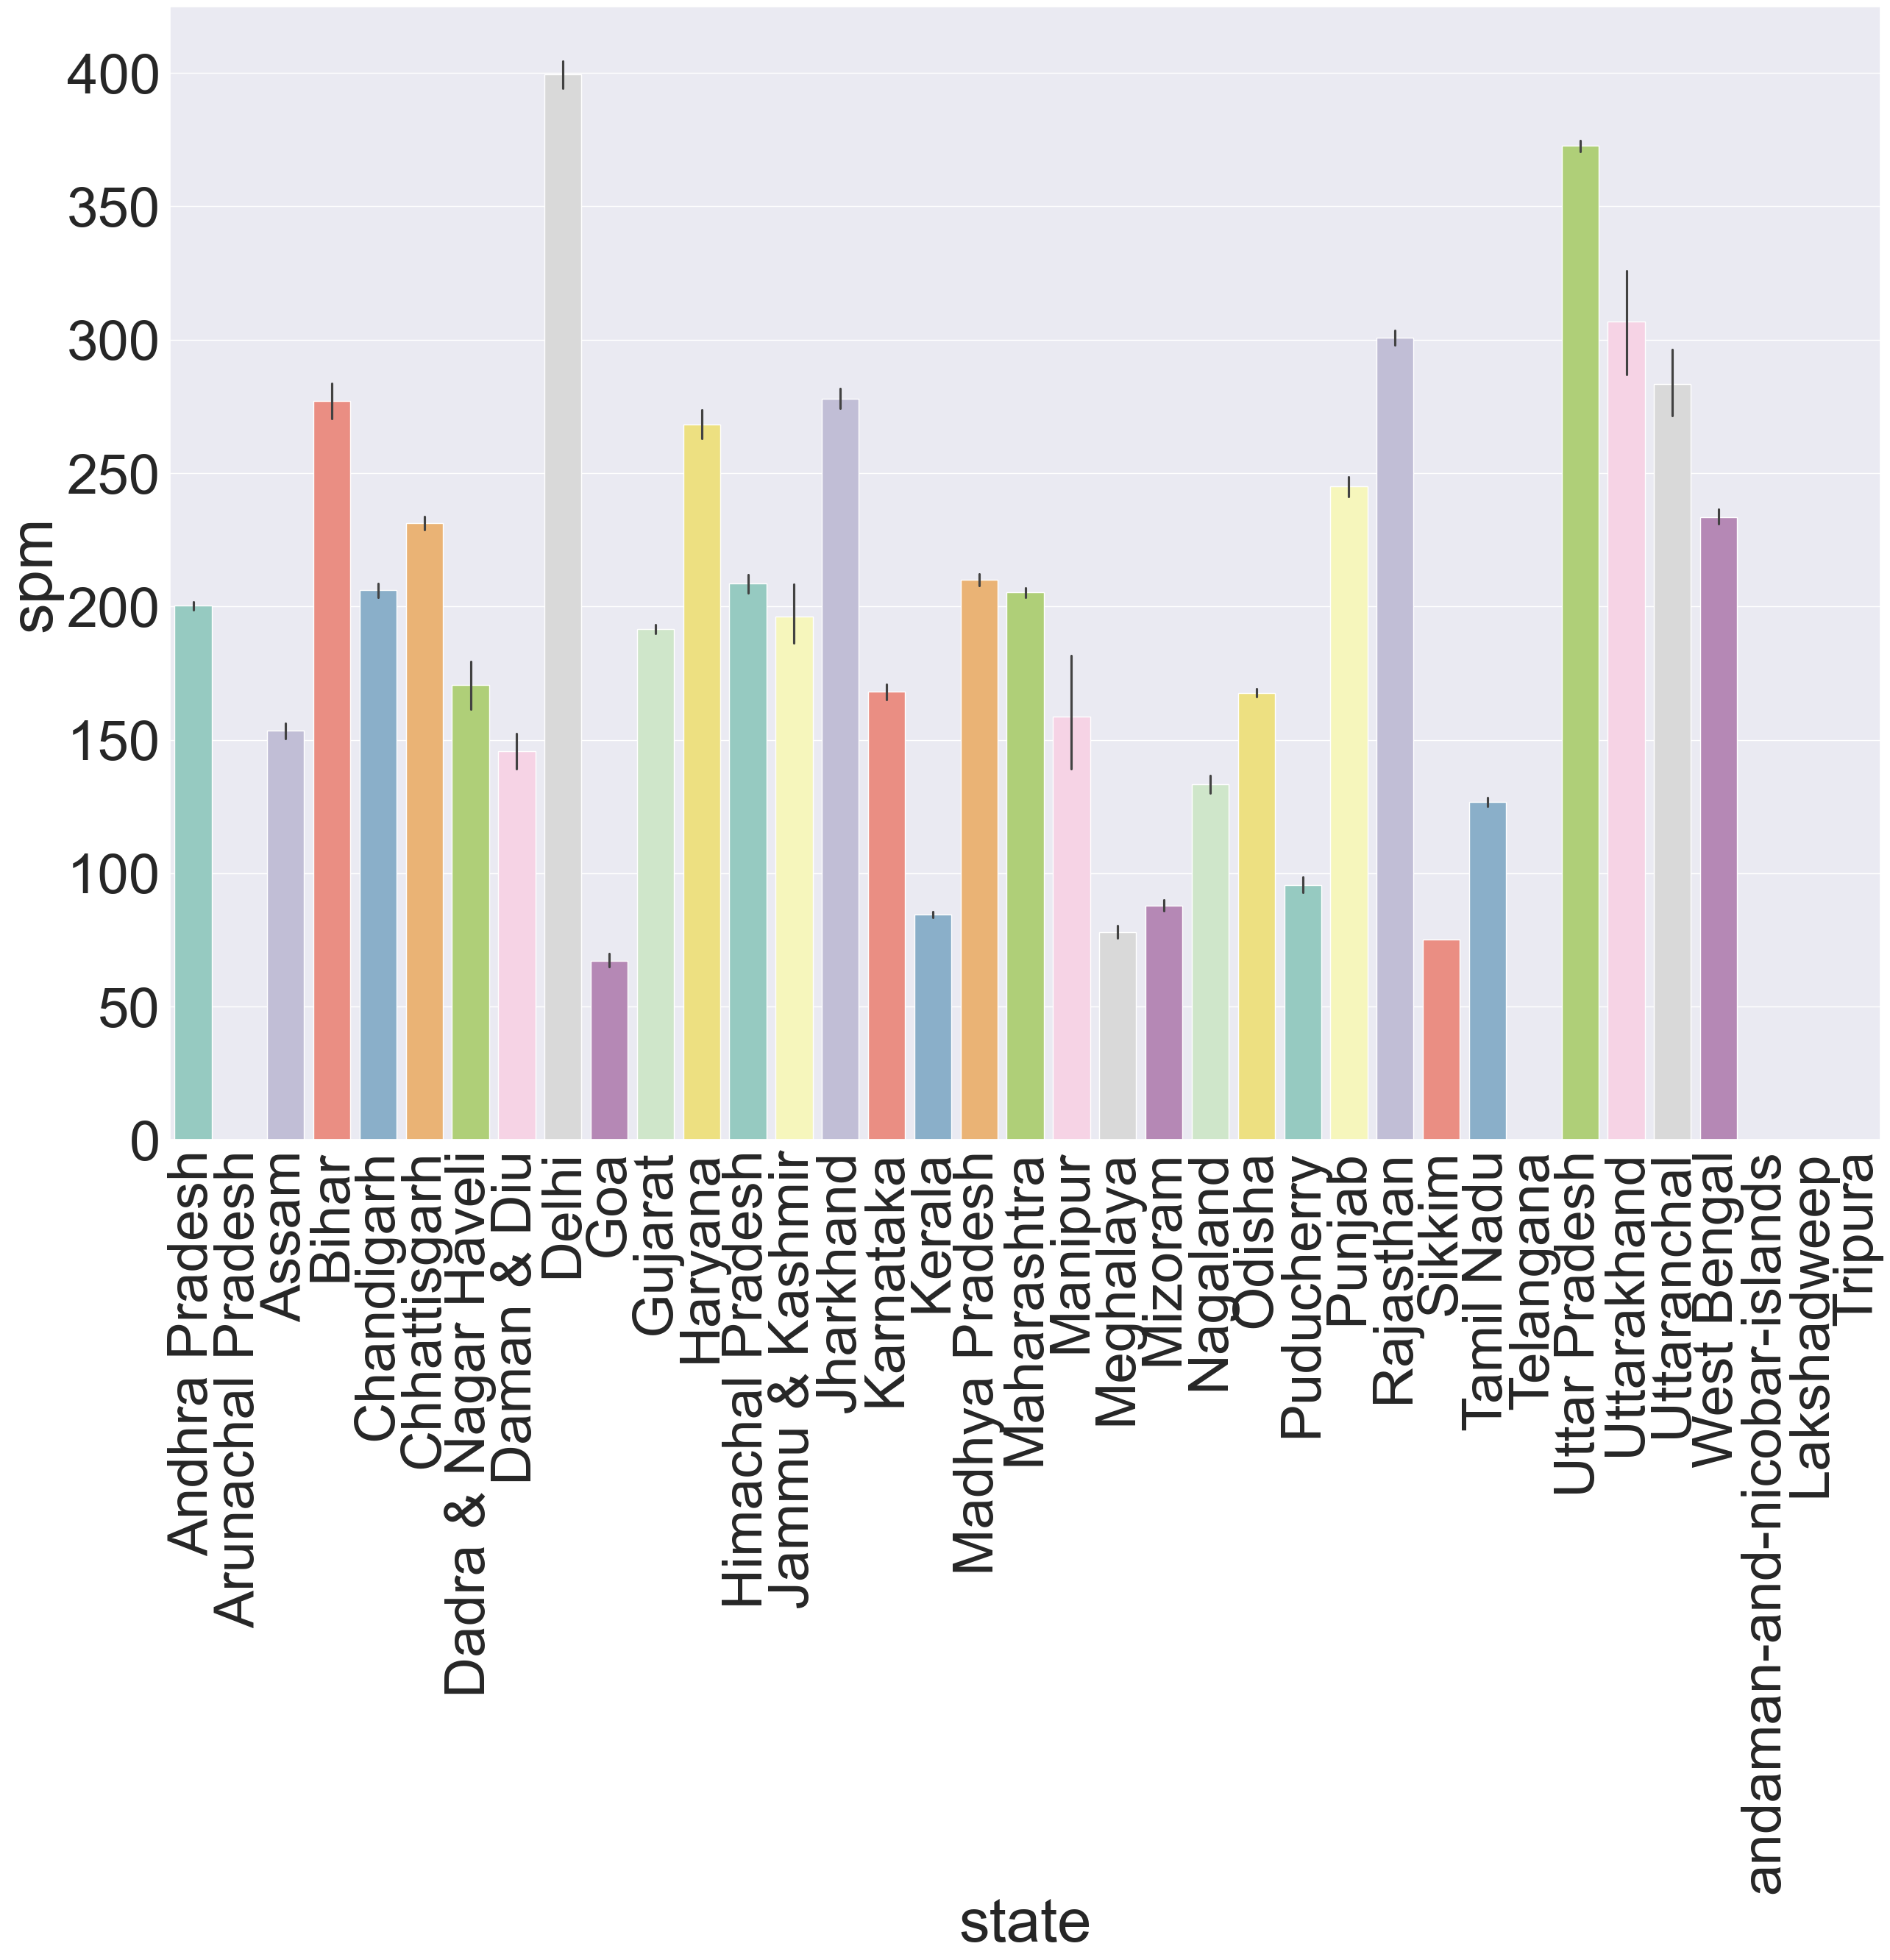

In [53]:
plt.figure(figsize=(30, 20))
plt.xticks(rotation=90)
custom_palette = sns.color_palette("Set3", n_colors=len(df['state']))
sns.barplot(x='state',y='spm',data=df,palette= custom_palette)
sns.set(font_scale=5)

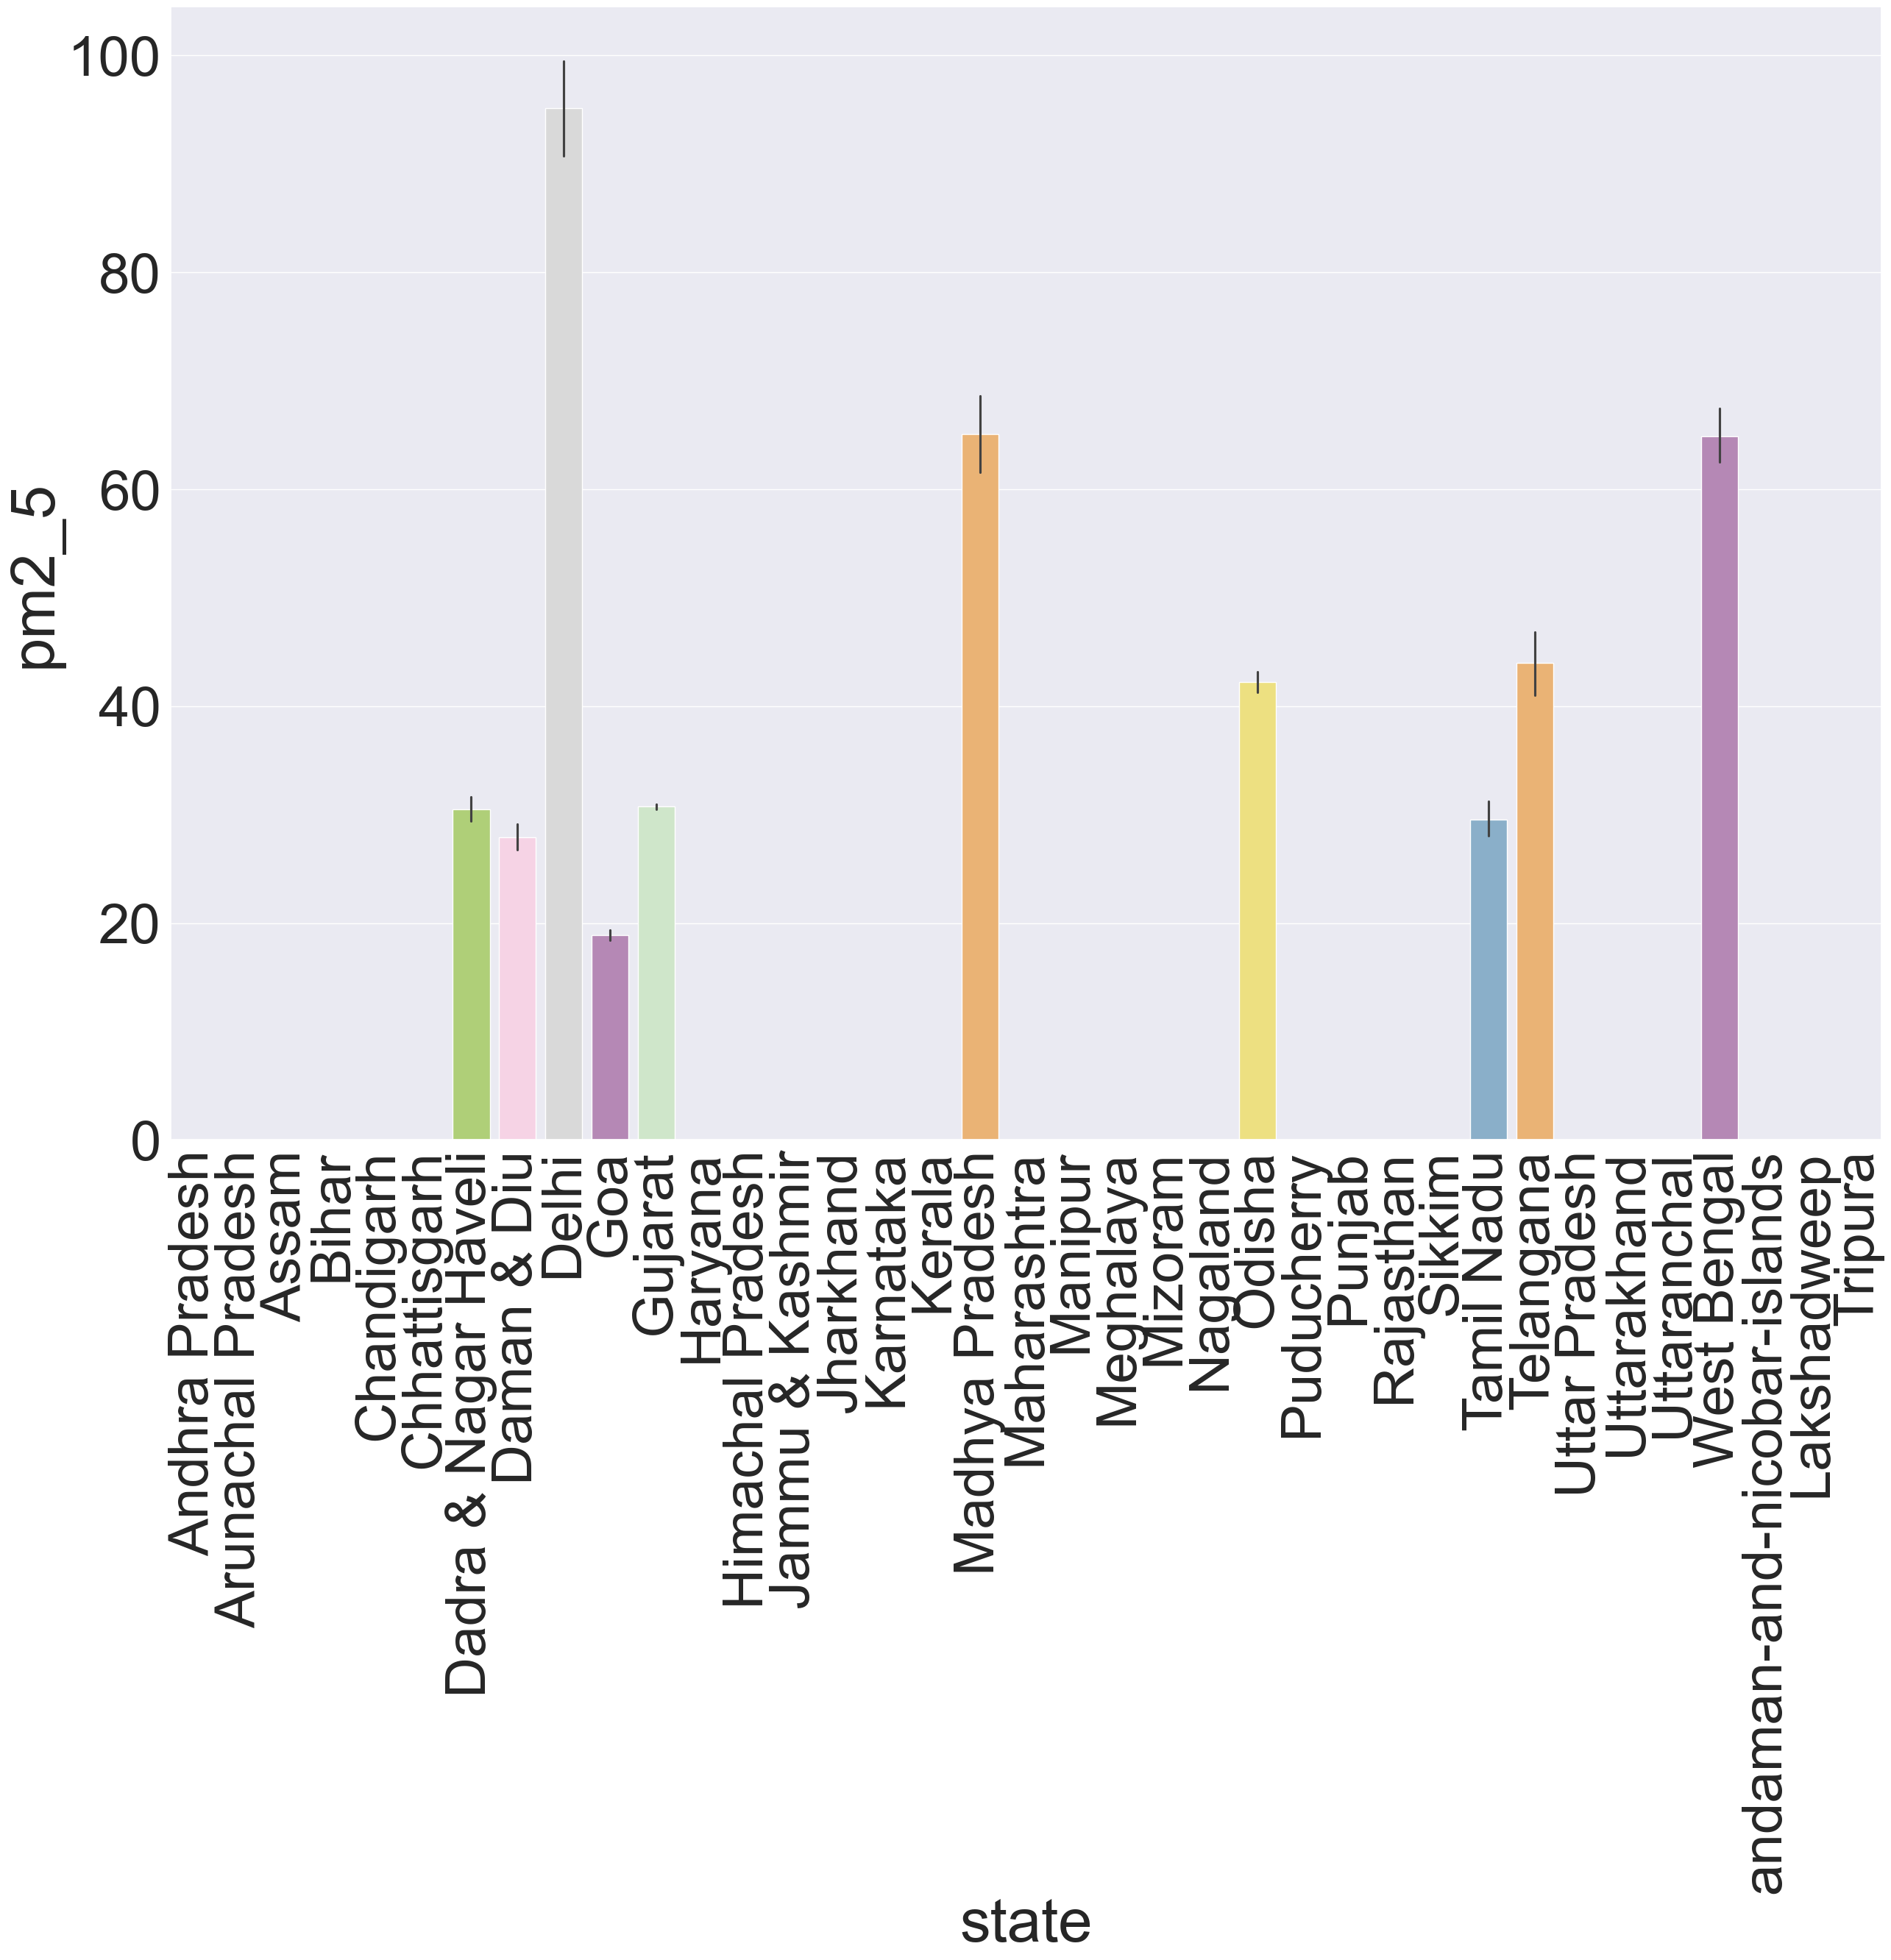

In [54]:
plt.figure(figsize=(30, 20))
plt.xticks(rotation=90)
custom_palette = sns.color_palette("Set3", n_colors=len(df['state']))
sns.barplot(x='state',y='pm2_5',data=df,palette= custom_palette)
sns.set(font_scale=5)

# Treating Null Values 

In [56]:
null_values = df.isnull().sum().sort_values(ascending=False)
null_values

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

In [57]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)

In [58]:
missing_data_percentage = pd.concat([null_values, null_values_percentage], axis=1 , keys=['Total','Percent'])

In [59]:
missing_data_percentage

,Total,Percent
pm2_5,426428,97.862497
spm,237387,54.478797
agency,149481,34.304933
stn_code,144077,33.064749
rspm,40222,9.230692
so2,34646,7.951035
location_monitoring_station,27491,6.309009
no2,16233,3.725370
type,5393,1.237659
date,7,0.001606


In [60]:
df.drop(['agency'],axis=1,inplace = True)
df.drop(['stn_code'],axis=1,inplace = True)
df.drop(['date'],axis=1,inplace = True)
df.drop(['sampling_date'],axis=1,inplace = True)
df.drop(['location_monitoring_station'],axis=1,inplace = True)

In [61]:
df.isnull().sum()

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
dtype: int64

In [62]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])

In [63]:
df.fillna(0, inplace = True)

In [64]:
df.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [66]:
df.head(3)

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0


# Formula Based Air Quality Index for So2

#The air quality index is a piecewise linear function of the pollutant concentration

# Function to Calculate Individual so2 Pollutant Index (si)

In [68]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si

df['so2_index'] = df['so2'].apply(cal_SOi)
df1 = df[['so2','so2_index']]
df1.head()

,so2,so2_index
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


# Function To Calculate Individual No2 Pollutant Index (No2)

In [70]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['No2_index']=df['no2'].apply(cal_Noi)
df_no2 = df[['no2','No2_index']]
df_no2.head()


,no2,No2_index
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


# Function To Calculate Individual Rspm Pollutant Index (rspm)

In [80]:
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rspm_index']=df['rspm'].apply(cal_RSPMI)
df_rspm= df[['rspm','Rpsm_index']]
df_rspm.head()


,rspm,Rpsm_index
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


# Function To Calculate Individual spm Pollutant Index (spm)

In [75]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
df['SPM_index']=df['spm'].apply(cal_SPMi)
df_spm= df[['spm','SPM_index']]
df_spm.head()


,spm,SPM_index
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


# Function To Calculate AQI Index for Every Data Value 

In [82]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['so2_index'],x['No2_index'],x['Rspm_index'],x['SPM_index']),axis=1)
data_AQI= df[['state','so2_index','No2_index','Rspm_index','SPM_index','AQI']]
data_AQI.head()

,state,so2_index,No2_index,Rspm_index,SPM_index,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [83]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,so2_index,No2_index,Rpsm_index,SPM_index,AQI,Rspm_index,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,21.750,0.0,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,0.0,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,35.625,0.0,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,18.375,0.0,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,9.375,0.0,Good


In [84]:
df.drop('Rpsm_index',axis=1,inplace=True)

In [85]:
df.head(3)

,state,location,type,so2,no2,rspm,spm,pm2_5,so2_index,No2_index,SPM_index,AQI,Rspm_index,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,21.750,0.0,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,8.750,0.0,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,35.625,0.0,Good


# Splitting The Dataset Into Dependent & Independent Variable 

In [86]:
X=df[['so2_index','No2_index','Rspm_index','SPM_index']]
Y=df['AQI']
X.head()


,so2_index,No2_index,Rspm_index,SPM_index
0,6.000,21.750,0.0,0.0
1,3.875,8.750,0.0,0.0
2,7.750,35.625,0.0,0.0
3,7.875,18.375,0.0,0.0
4,5.875,9.375,0.0,0.0


In [87]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(348593, 4) (87149, 4) (348593,) (87149,)


# Linear Regression 

In [88]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [89]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

In [90]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  13.583424938613533
RMSE TestData =  13.672937344789004
--------------------------------------------------
RSquared value on train: 0.9849533579250526
RSquared value on test: 0.9847286394495923


# Decison Tree Regressor 

In [91]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [92]:
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

In [93]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  2.241205692702796e-13
RMSE TestData =  1.2990443246488912
--------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.9998621515068311


# Random Forest Regressor 

In [94]:
RF=RandomForestRegressor().fit(X_train,Y_train)

In [95]:
#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

In [96]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.435138769615289
RMSE TestData =  1.155114070584906
--------------------------------------------------
RSquared value on train: 0.9999845589590535
RSquared value on test: 0.9998910056886952


# Classification Algorithm 

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [100]:
X2 = df[['so2_index','No2_index','Rspm_index','SPM_index']]
Y2 = df['AQI_Range']

In [101]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.33, random_state=70)

# Logistic Regression 

In [102]:
log_reg = LogisticRegression().fit(X_train2, Y_train2)


In [103]:
train_preds2 = log_reg.predict(X_train2)
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds2))

Model accuracy on train is:  0.7276012426913104


In [104]:
test_preds2 = log_reg.predict(X_test2)
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds2))
print('-'*50)
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds2))

Model accuracy on test is:  0.7271254216071491
--------------------------------------------------
KappaScore is:  0.584377382981496


# Decision Tree Classifier 

In [105]:
DT2 = DecisionTreeClassifier().fit(X_train2,Y_train2)
 
train_preds3 = DT2.predict(X_train2)
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds3))

test_preds3 = DT2.predict(X_test2)
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds3))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds3))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9998052783476477
--------------------------------------------------
KappaScore is:  0.9997111940619162


# Random Forest Classifier 

In [106]:
#fit the model on train data 
RF=RandomForestClassifier().fit(X_train2,Y_train2)
#predict on train 
train_preds4 = RF.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds4))

#predict on test
test_preds4 = RF.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds4))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds4))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9998330957265552
--------------------------------------------------
KappaScore is:  0.9997524564051932


# K - Nearest Neighbors 

In [107]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(X_train2,Y_train2)
#predict on train 
train_preds5 = KNN.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds5))

#predict on test
test_preds5 = KNN.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds5))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds5))

Model accuracy on train is:  0.9981400733694814
Model accuracy on test is:  0.9967105949441913
--------------------------------------------------
KappaScore is:  0.9951205100052113
